## Promedio, moda y mediana

In [22]:
import pandas as pd

df = pd.read_csv('../data/raw/wine_data.csv', delimiter=",")

In [23]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3


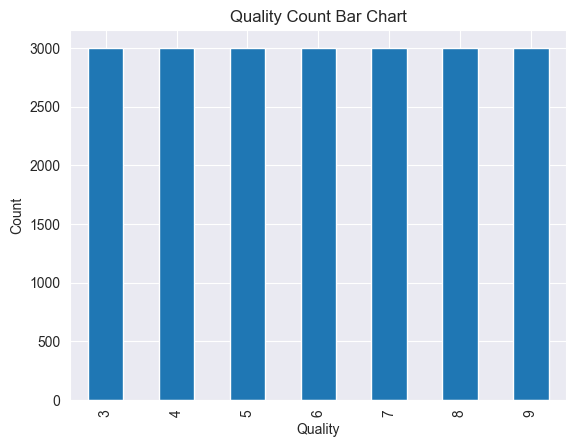

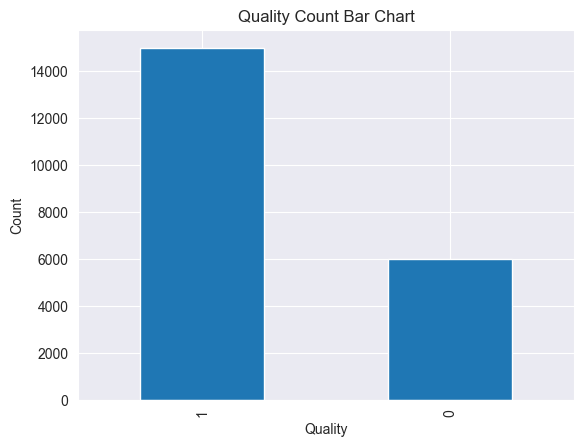

In [24]:
import matplotlib.pyplot as plt
df["quality"].value_counts().plot(kind="bar")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Quality Count Bar Chart")
plt.show()

df['quality'] = (df['quality'] >= 5).astype('int8')

df["quality"].value_counts().plot(kind="bar")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Quality Count Bar Chart")
plt.show()

In [5]:
df.tail(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
20995,9.7,1.02,0.91,50.0,0.412,114.6,181.7,1.02085,3.30,0.89,12.0,1
20996,10.2,0.61,0.88,53.8,0.250,62.4,204.7,1.02776,3.52,1.14,9.7,1
20997,13.4,0.46,1.04,52.1,0.449,63.0,273.5,1.02618,2.89,1.76,9.3,1
20998,6.6,1.03,1.09,25.3,0.138,179.8,295.0,1.02476,2.94,1.54,12.9,1
20999,9.3,0.93,1.32,33.6,0.412,128.7,290.1,1.02182,3.16,1.42,13.0,1


In [6]:
df_stats = df.describe().T
print(df_stats)

                        count        mean         std      min         25%  \
fixed_acidity         21000.0    9.797079    2.413919  3.80000    7.600000   
volatile_acidity      21000.0    0.774796    0.365015  0.08000    0.430000   
citric_acid           21000.0    0.793870    0.384833  0.00000    0.410000   
residual_sugar        21000.0   31.289348   19.015391  0.60000    9.800000   
chlorides             21000.0    0.200245    0.124933  0.00900    0.072000   
free_sulfur_dioxide   21000.0  129.442333   77.167262  1.00000   45.000000   
total_sulfur_dioxide  21000.0  229.008762  100.183265  6.00000  150.000000   
density               21000.0    1.009972    0.012032  0.98711    0.997417   
pH                    21000.0    3.158712    0.171371  2.72000    3.030000   
sulphates             21000.0    1.020641    0.408304  0.22000    0.620000   
alcohol               21000.0   11.291716    1.182198  8.00000   10.400000   
quality               21000.0    0.714286    0.451765  0.00000  

In [7]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print('Columnas numericas: ', numerical_cols)

#Se eliminan todas las columnas y filas que contengan datos NaN
df_cleaned = df.dropna(axis=1, how='all')

Columnas numericas:  Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


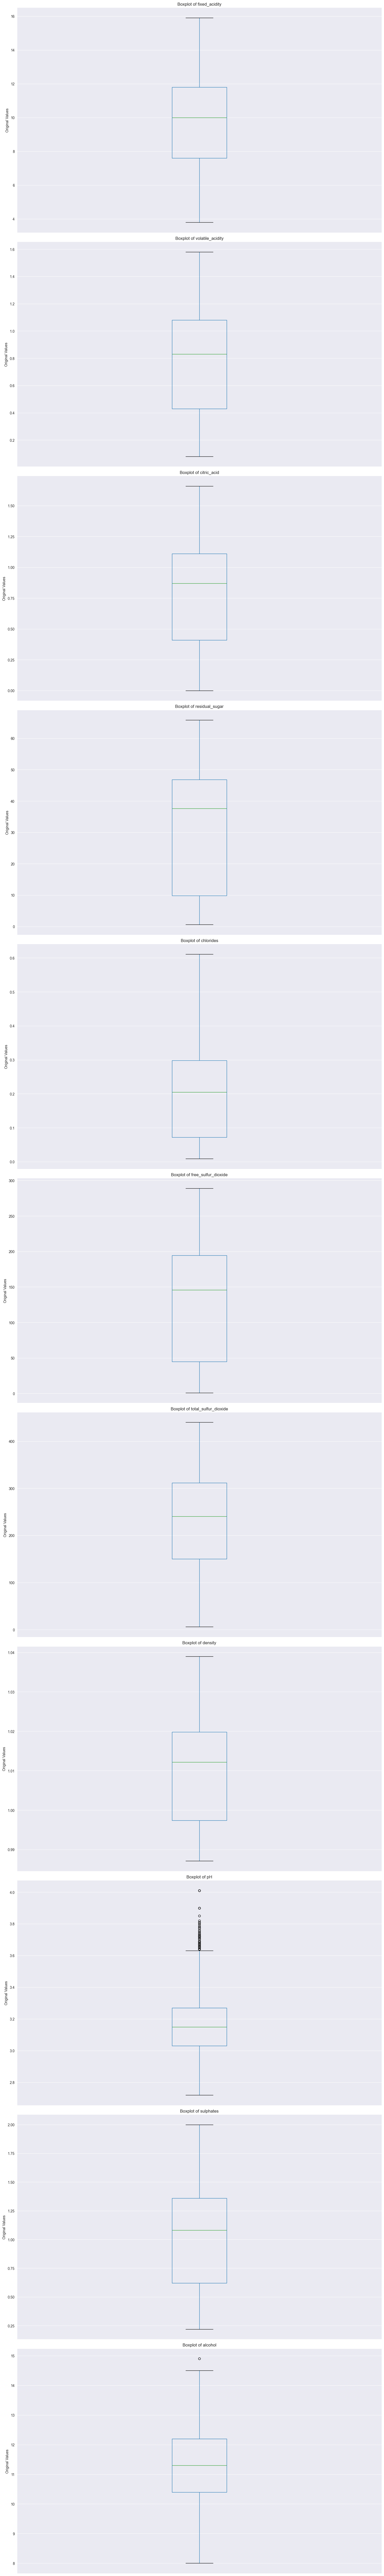

In [8]:
# Boxplot de los inputs
import matplotlib.pyplot as plt

plt.figure(figsize=(15,100))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    df.boxplot([column])
    plt.title(f"Boxplot of {column}")
    plt.ylabel("Original Values")
    plt.xticks([])  

plt.tight_layout()
plt.show()

In [9]:
# Vamos a remover outliers
def remove_outliers_iqr(_df, _columna, factor=1.5):
    Q1 = _df[_columna].quantile(0.25)
    Q3 = _df[_columna].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - factor * IQR
    limite_superior = Q3 + factor * IQR

    df_filtrado = _df[(_df[_columna] >= limite_inferior) & (_df[_columna] <= limite_superior)]
    return df_filtrado

cleaned_df = remove_outliers_iqr(df_cleaned, numerical_cols)
cleaned_df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,20890.000000,21000.000000,20999.000000,0.0
mean,9.797079,0.774796,0.793870,31.289348,0.200245,129.442333,229.008762,1.009972,3.155820,1.020641,11.291544,NaN
std,2.413919,0.365015,0.384833,19.015391,0.124933,77.167262,100.183265,0.012032,0.167038,0.408304,1.181964,NaN
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,NaN
25%,7.600000,0.430000,0.410000,9.800000,0.072000,45.000000,150.000000,0.997417,3.030000,0.620000,10.400000,NaN
50%,10.000000,0.830000,0.870000,37.600000,0.205000,145.800000,240.500000,1.012200,3.150000,1.080000,11.300000,NaN
75%,11.800000,1.080000,1.110000,46.800000,0.298000,194.325000,311.625000,1.019840,3.270000,1.360000,12.200000,NaN
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,3.630000,2.000000,14.500000,NaN


## Matriz de correlación
Para calcular nuestra matriz de correlacion, lo que hicimos fue tomar la base de datos, convertir a valores numericos aquellos campos que no fueran de este tipo y por ultimo eliminar aquellas columnas las cuales fueran todas NaN.
Una vez que 'limpiamos' la base de datos, dibujamos la matriz.

In [10]:
df_cleaned_stats = cleaned_df.describe().T

df_norm = (cleaned_df - df_cleaned_stats['mean']) / df_cleaned_stats['std']  
# Para normalizar: (valor - promedio) / desv_estandar

df_norm_stats = df_norm.describe().T
print(df_norm_stats)


                        count          mean  std       min       25%  \
fixed_acidity         21000.0  8.661854e-16  1.0 -2.484375 -0.910171   
volatile_acidity      21000.0  1.948917e-16  1.0 -1.903473 -0.944608   
citric_acid           21000.0  3.031649e-16  1.0 -2.062891 -0.997495   
residual_sugar        21000.0 -1.624098e-16  1.0 -1.613921 -1.130103   
chlorides             21000.0  1.515825e-16  1.0 -1.530780 -1.026510   
free_sulfur_dioxide   21000.0  1.299278e-16  1.0 -1.664467 -1.094277   
total_sulfur_dioxide  21000.0 -6.496391e-17  1.0 -2.226008 -0.788642   
density               21000.0  5.370350e-15  1.0 -1.900136 -1.043461   
pH                    20890.0  1.741493e-16  1.0 -2.609104 -0.753241   
sulphates             21000.0 -2.923376e-16  1.0 -1.960895 -0.981233   
alcohol               20999.0 -7.579483e-16  1.0 -2.784808 -0.754290   
quality                   0.0           NaN  NaN       NaN       NaN   

                           50%       75%       max  
fixed_acid

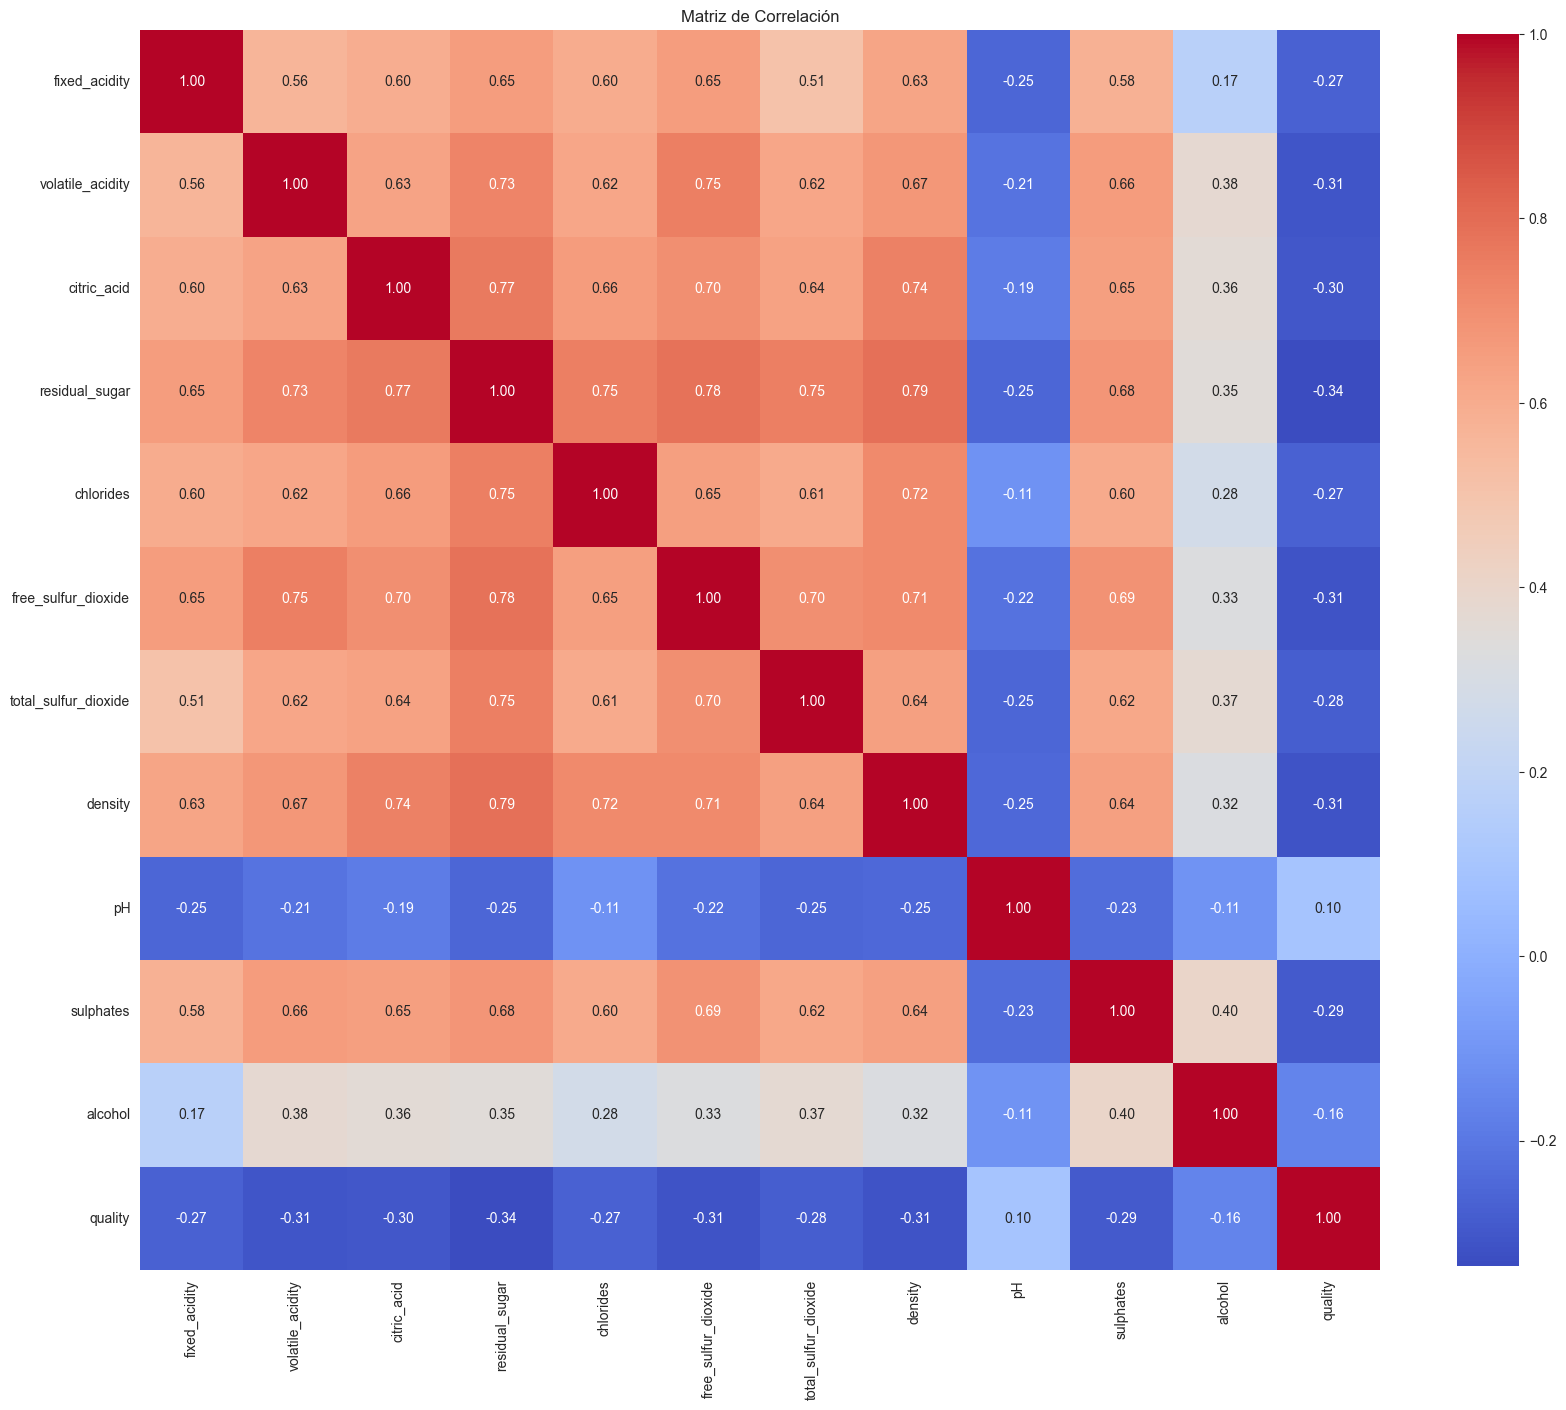

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


correlations = df.corr(method='pearson')

plt.figure(figsize=(20, 20))

sns.heatmap(correlations, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Matriz de Correlación')
plt.show()


In [ ]:
# Extraer las columnas de entrada, escalar por 255
all_inputs = (all_data.iloc[:, 0:3].values / 255.0)
all_outputs = all_data.iloc[:, -1].values

# Dividir en un conjunto de entrenamiento y uno de prueba
X_train, X_test, Y_train, Y_test = train_test_split(all_inputs, all_outputs,
    test_size=1/3)

n = X_train.shape[0] # número de registros de entrenamiento

# Construir una red neuronal con pesos y sesgos
# iniciados aleatoriamente
w_hidden = np.random.rand(3, 3)
w_output = np.random.rand(1, 3)

b_hidden = np.random.rand(3, 1)
b_output = np.random.rand(1, 1)

# Funciones de activacion
relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))

# Funcion que corre la red neuronal con los datos de entrada para predecir la salida
def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2

# Calculo de precisión
test_predictions = forward_prop(X_test.transpose())[3] # me interesa solo la capa de salida, A2
test_comparisons = np.equal((test_predictions >= .5).flatten().astype(int), Y_test)
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0])
print("ACCURACY: ", accuracy)

In [12]:
import numpy as np

# Implementación de la red neuronal con una capa oculta utilizando numpy

# Definir funciones de activación y sus derivadas
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Inicialización de la red neuronal

# Tomo las columnas relevantes (segun matriz de correlacion)
relevant_columns = cleaned_df.iloc[:, :-1]
input_size = relevant_columns.shape[1]  # Número de características seleccionadas
hidden_layer_size = 11
output_size = 1  # Para la clasificación binaria

# Inicializar los pesos y sesgos
np.random.seed(33)  # Para reproducibilidad
weights_input_hidden = np.random.rand(input_size, hidden_layer_size)
bias_hidden = np.random.rand(hidden_layer_size)
weights_hidden_output = np.random.rand(hidden_layer_size, output_size)
bias_output = np.random.rand(output_size)

# Función para el entrenamiento de la red neuronal
def train_neural_network(X, y, learning_rate=0.001, epochs=1000):
    global weights_input_hidden, bias_hidden, weights_hidden_output, bias_output
    
    # Iterar sobre el número de épocas
    for epoch in range(epochs):
        # Forward pass
        hidden_input = np.dot(X, weights_input_hidden) + bias_hidden
        hidden_output = relu(hidden_input)

        final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
        final_output = sigmoid(final_input)

        # Calcular el error (función de costo: error cuadrático medio)
        error = y - final_output
        cost = np.mean(error ** 2)

        # Retropropagación
        # Calcular gradientes para la capa de salida
        output_gradient = error * sigmoid_derivative(final_input)
        weights_hidden_output_gradient = np.dot(hidden_output.T, output_gradient)
        bias_output_gradient = np.sum(output_gradient, axis=0)

        # Calcular gradientes para la capa oculta
        hidden_gradient = np.dot(output_gradient, weights_hidden_output.T) * relu_derivative(hidden_input)
        weights_input_hidden_gradient = np.dot(X.T, hidden_gradient)
        bias_hidden_gradient = np.sum(hidden_gradient, axis=0)

        # Actualizar pesos y sesgos
        weights_input_hidden += learning_rate * weights_input_hidden_gradient
        bias_hidden += learning_rate * bias_hidden_gradient
        weights_hidden_output += learning_rate * weights_hidden_output_gradient
        bias_output += learning_rate * bias_output_gradient

        # Mostrar el costo cada 100 épocas
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Costo: {cost:.4f}")

# Preparar los datos de entrada
X = cleaned_df.iloc[:, :-1].values
y = (cleaned_df['quality'].values > 5).astype(int).reshape(-1, 1)  # Clasificación binaria: quality > 5

# Normalizar las características de entrada
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Entrenar la red neuronal
train_neural_network(X, y, learning_rate=0.01, epochs=1000)


Epoch 0, Costo: nan
Epoch 100, Costo: nan
Epoch 200, Costo: nan
Epoch 300, Costo: nan
Epoch 400, Costo: nan
Epoch 500, Costo: nan
Epoch 600, Costo: nan
Epoch 700, Costo: nan
Epoch 800, Costo: nan
Epoch 900, Costo: nan
